### Cap. 10 - Introdução às Redes Neurais Artificiais 

As redes neurais artificiais nasceram com a inspiração biológica do neurônio. O neurônio artificial se chamava Perceptron e foi usado para fazer operações lógicas, embora tivesse algumas limitações ( como um XOR). Algumas dessas limitações puderam ser superadas ou com melhorias em seu algoritmo ou com o empilhamento de neurônios - é o caso do Multi Layer Perceptron, que conseguiu superar a limitação inicial de aprender padrões XOR ( não-exclusivo).

Tensorflow é uma tecnologia para computação de tensores, um tipo de dado multidimensional ( como arrays são para 1 dimensão, matrizes para 2, tensores são para N). Esses tensores representam o espaço problema que será navegado pelos algoritmos de redes neurais.

#### Keras e tensorflow

Keras é uma camada de alto nível para implementação de redes neurais. Pode usar vários backends, dentre eles o Tensorflow.

Aqui trabalharemos com o Fashion MNINST, que é uma base semelhante àquela de dígitos escritos à mão mas que contém desenhos de roupas. Usaremos a Sequential API, que é um dos modos de uso do Keras que se baseia na premissa de que a rede neural é definida como uma lista de camadas, executada sequencialmente.

In [1]:
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

tf.__version__


2023-01-28 21:58:02.556978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-28 21:58:11.870696: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-28 21:58:11.870765: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-28 21:59:06.626282: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

'2.11.0'

In [2]:
keras.__version__

'2.11.0'

Cada arquivo é uma imagem de 28x28 pixels, com 10 classes. São 70k imagens em tons de cinza.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full),  (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Agora vamos tornar todos os pixels entre 0 e 1 já que usaremos gradiente descendente. Um jeito rápido de fazer isso é dividir tudo por 255, que é o valor máximo de intensidade de um pixel.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [6]:
import matplotlib.pyplot as plt

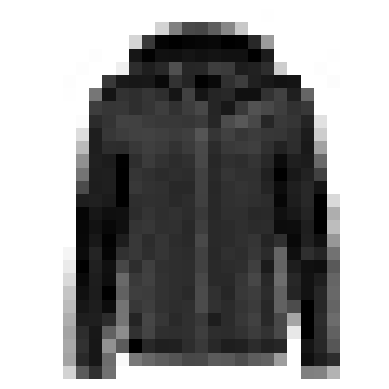

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

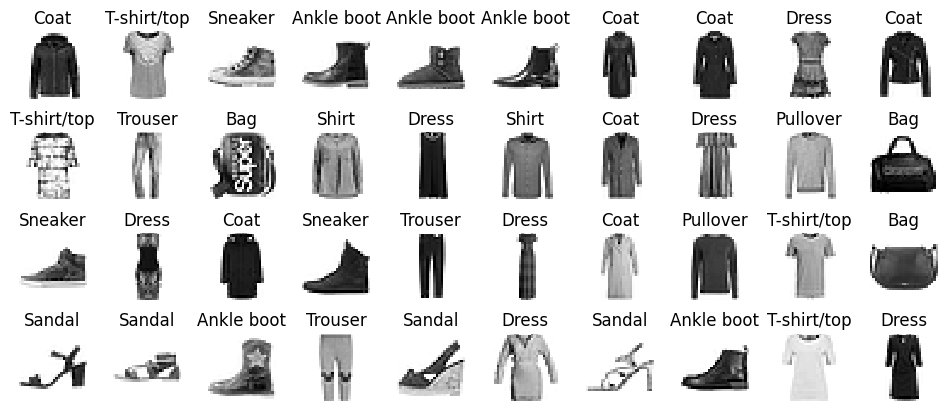

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Ok, agora vamos construir nosso modelo.

In [11]:
model = keras.models.Sequential() # nosso modelo será uma sequência de camadas 

model.add(keras.layers.Flatten(input_shape=[28,28])) # a camada inicial simplesmente vai serializar todos os pixels. A entrada tem 28x28
model.add(keras.layers.Dense(300,activation='relu')) # a próxima camada tem 300 neurônios e se ativa com ReLu
model.add(keras.layers.Dense(100, activation='relu')) # a camada seguinte tem 100 neurônios. ReLu basicamente substitui os valores negativos por zero, só ativa o que é maior que zero
model.add(keras.layers.Dense(10, activation='softmax')) #são 10 classes exclusivas então nossa saída é um softmax com 10 neurônios

2023-01-28 21:59:27.181373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-28 21:59:27.281683: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-28 21:59:27.281824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (edu-VJFE42F11X-XXXXXX): /proc/driver/nvidia/version does not exist
2023-01-28 21:59:27.456151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.layers

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:

model.get_layer(hidden1.name) is hidden1

True

In [18]:

weights, biases = hidden1.get_weights()

In [19]:
weights

array([[ 0.04719825, -0.06109337, -0.01157858, ...,  0.02434396,
        -0.00384599,  0.03664397],
       [ 0.04277879,  0.01401585,  0.0736867 , ..., -0.03012241,
         0.06715994, -0.02442091],
       [-0.06265528, -0.07425603, -0.06420834, ..., -0.06617876,
         0.03998971, -0.00994496],
       ...,
       [ 0.02258673, -0.03541153,  0.01315563, ..., -0.03397214,
        -0.03874674,  0.05407298],
       [-0.01127201,  0.06685099, -0.04721097, ...,  0.00467533,
         0.05260228, -0.05622483],
       [ 0.02444261,  0.05780625,  0.00065769, ...,  0.05644196,
         0.06846489,  0.00018227]], dtype=float32)

In [20]:

weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Vamos compilar o modelo, de modo a especificar a função de perda e de otimização. A função de perda é uma forma de determinar a distância entre o certo e o errado. E a de otimização é como corrigir essa distância.

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Agora vamos treinar com o método fit

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7270 - accuracy: 0.7598 - val_loss: 0.5092 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4900 - accuracy: 0.8292 - val_loss: 0.4415 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4449 - accuracy: 0.8444 - val_loss: 0.4526 - val_accuracy: 0.8436
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4182 - accuracy: 0.8532 - val_loss: 0.4096 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3976 - accuracy: 0.8589 - val_loss: 0.3996 - val_accuracy: 0.8608
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3811 - accuracy: 0.8653 - val_loss: 0.3831 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3687 - accuracy: 0.8701 - val_loss: 0.3665 - val_accurac

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [27]:
history.history

{'loss': [0.7270378470420837,
  0.4899706542491913,
  0.44490692019462585,
  0.41821494698524475,
  0.39759132266044617,
  0.3811018466949463,
  0.36869123578071594,
  0.35714420676231384,
  0.34569233655929565,
  0.3359566628932953,
  0.32679009437561035,
  0.31905826926231384,
  0.31264638900756836,
  0.30535900592803955,
  0.29907330870628357,
  0.2925867438316345,
  0.28769779205322266,
  0.28190621733665466,
  0.27531975507736206,
  0.2724308669567108,
  0.2669912874698639,
  0.2621559202671051,
  0.25906920433044434,
  0.2540234625339508,
  0.24842873215675354,
  0.24609608948230743,
  0.24180039763450623,
  0.23775708675384521,
  0.23300477862358093,
  0.2303139865398407],
 'accuracy': [0.7598000168800354,
  0.8291636109352112,
  0.8444363474845886,
  0.8531636595726013,
  0.8589272499084473,
  0.8652545213699341,
  0.870127260684967,
  0.8726363778114319,
  0.8760545253753662,
  0.8808000087738037,
  0.8837090730667114,
  0.8853636384010315,
  0.8873999714851379,
  0.8903636336

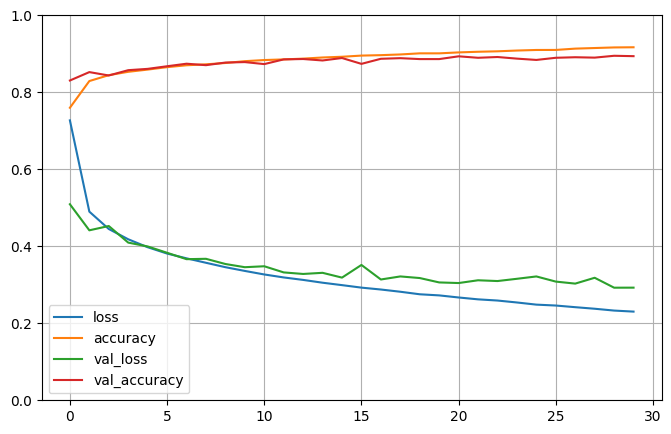

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Agora podemos ver como o modelo se sai na base de teste:

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 64.3958 - accuracy: 0.8492


[64.39582824707031, 0.8492000102996826]

### Fazendo previsões com o modelo
usaremos o método predict para isso

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 298ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 29ms/step


array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

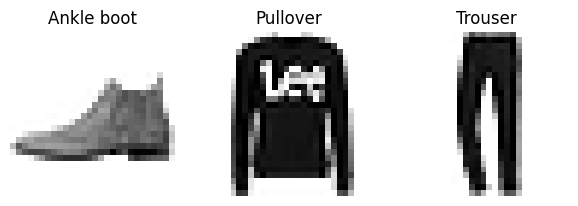

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Regressão com Sequential API

Para estudar a regressão vamos voltar ao problema dos imóveis na Califórnia e resolvê-lo usando uma rede neural de regressão.

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 1.9890 - val_loss: 0.9639
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7236 - val_loss: 0.6484
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6240 - val_loss: 0.5954
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5675
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5590 - val_loss: 0.5400
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5367 - val_loss: 0.5259
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5189 - val_loss: 0.4983
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5040 - val_loss: 0.4830
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4918 - val_loss: 0.4757
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4813 - val_loss: 0.4770

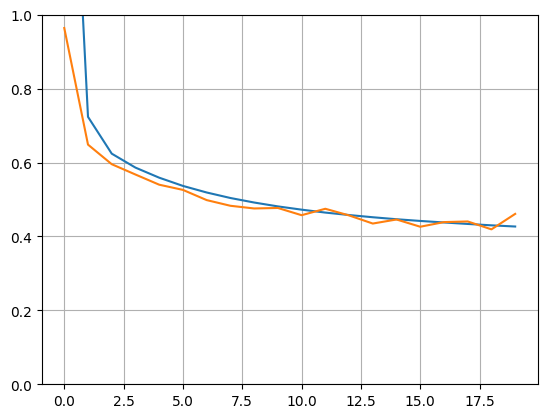

In [38]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Functional API

As vezes queremos padrões mais complexos do que simplesmente empilhar camadas. Para esses casos usamos a Functional API do keras. Um exemplo desse tipo de arquitetura é a Wide and Deep, que é uma rede que liga neurônios de entrada nas camadas finais, ao mesmo tempo que há uma rota normal. Isso permite aprender padrões complexos ao mesmo tempo que aprende regras simples.

In [39]:
#arquitetura wide and deep
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [41]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.1428 - val_loss: 1.1241
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7447 - val_loss: 0.9218
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6797 - val_loss: 0.7126
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6319 - val_loss: 0.5780
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5958 - val_loss: 0.5435
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5632 - val_loss: 0.5811
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5418 - val_loss: 0.5440
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5226 - val_loss: 0.4851
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5041 - val_loss: 0.4843
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4900 - val_loss: 0.5106

In [42]:
model.save('modelo1.h5')

In [43]:
model = keras.models.load_model('modelo1.h5')

### Callbacks
As vezes o treinamento pode ser **muito demorado** e é necessário que saibamos pontos específicos de desempenho até para definir critérios de parada por exemplo. Faemos isso por meio de callbacks.